In [201]:
# Import external libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from geopy.geocoders import Nominatim
import folium
plt.style.use('ggplot')

In [2]:
zom_df = pd.read_csv('../../data/zomato/zomato.csv')

In [3]:
zom_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Cleaning the Data

Let's see how ratings are formatted.

In [4]:
zom_df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

Because the ratings are strings, we will need to convert them to floats.

In [5]:
# First, we will need to remove the space in between the numerator and the '/'.
zom_df['rate'] = zom_df['rate'].str.replace(' ', '')

# Then, remove the '/5' from the string.
zom_df['rate'] = zom_df['rate'].str.replace('/5', '')

In [6]:
zom_df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3', '-',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

In [7]:
# Adding .copy() at the end fixes the SettingCopyWithWarning warning.
# We will have to analyze new restaurants separately.

zom_df_floats = zom_df[(zom_df['rate'] != 'NEW') & (zom_df['rate'] != '-')].copy()
zom_df_floats['rate'] = zom_df_floats['rate'].astype(float)

Now, we will replace 'Yes' values with 1, and 'No' values with 0.

In [8]:
zom_df_floats['online_order'] = zom_df_floats['online_order'].replace(('Yes', 'No'), (1, 0))

In [9]:
zom_df_floats['book_table'] = zom_df_floats['book_table'].replace(('Yes', 'No'), (1, 0))

Now, we will convert the 'approx_cost(for two people)' column to numerical values.

In [10]:
zom_df_floats['approx_cost(for two people)'] = zom_df_floats['approx_cost(for two people)'].str.replace(',', '')

In [11]:
# Using .astype(float) to account for nan values.
zom_df_floats['approx_cost(for two people)'] = zom_df_floats['approx_cost(for two people)'].astype(float)

Let us see how the 'rest_types' column is formatted.

In [24]:
zom_df_floats['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [27]:
# Replacing the nan values with 'NA'
zom_df_floats['rest_type'] = zom_df_floats['rest_type'].fillna('NA')

In [40]:
# This gives each restaurant its first rest_type in its own column.

split_rest_types = lambda df: df['rest_type'].split(',')[0]
zom_df_floats['rest_type_single'] = zom_df_floats.apply(split_rest_types, axis = 1)

In [45]:
len(zom_df_floats['rest_type_single'].unique())

24

Now, to reduce the number of unique cuisines, we will give each restaurant its first cuisine type.

In [95]:
split_cuisines = lambda df: df['cuisines'].split(',')[0]

zom_df_floats['cuisines'] = zom_df_floats['cuisines'].fillna('NA')

In [101]:
zom_df_floats['cuisine_single'] = zom_df_floats.apply(split_cuisines, axis = 1)

Now, let us add the latitude and longitude to the restaurants in the dataframe.

In [171]:
zom_df_floats['listed_in(city)'].nunique()

30

In [172]:
zom_df_floats['location'].nunique()

93

In [ ]:
geolocator = Nominatim(timeout = 10, user_agent = 'my_geolocator')

In [282]:
locations = pd.DataFrame({'Name' : zom_df['location'].unique()})

In [283]:
locations['Name'] = locations['Name'].apply(lambda x: str(x) + ', Bangalore')

In [285]:
lat_long = []

for location in locations['Name']:
    location = geolocator.geocode(location)
    
    if location is None:
        lat_long.append(np.nan)
    else:
        geo = (location.latitude, location.longitude)
        lat_long.append(geo)

In [286]:
locations['geo_loc'] = lat_long

In [294]:
locations['Name'] = locations['Name'].apply(lambda x: x.replace(', Bangalore', '')[0:])

In [295]:
locations

,Name,geo_loc
0,Banashankari,"(12.9152208, 77.573598)"
1,Basavanagudi,"(12.9417261, 77.5755021)"
2,Mysore Road,"(12.9455407, 77.5286919)"
3,Jayanagar,"(12.9292731, 77.5824229)"
4,Kumaraswamy Layout,"(12.9081487, 77.5553179)"
...,...,...
89,West Bangalore,"(12.9164172, 77.6516188)"
90,Magadi Road,"(12.9736861, 77.5502104)"
91,Yelahanka,"(13.1006982, 77.5963454)"
92,Sahakara Nagar,"(12.925455, 77.485201)"


## Visualizing the Data of Restaurants with Ratings.

First, let us see the distribution of the ratings.

<AxesSubplot:title={'center':'Distribution of Ratings'}, xlabel='rate', ylabel='count'>

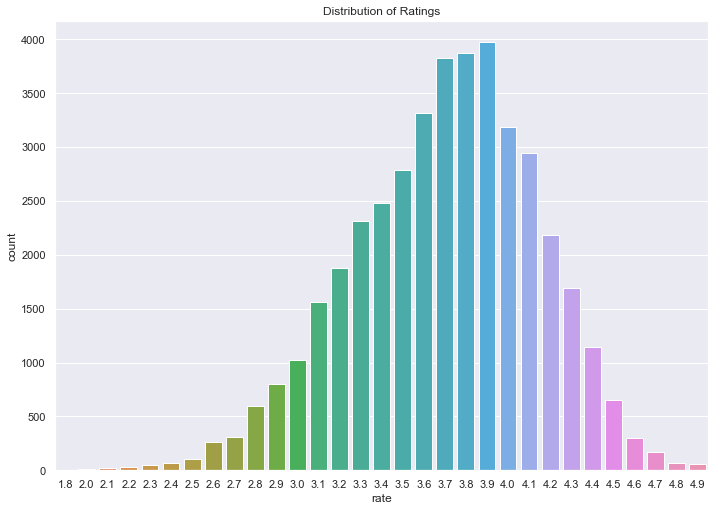

In [19]:
sns.set(rc = { 'figure.figsize':(11.7,8.27) }) # Sets figure size.

plt.title('Distribution of Ratings')

sns.countplot(
    x = 'rate',
    data = zom_df_floats
)

Now, let us see the correlations between the columns with numerical values.

<AxesSubplot:>

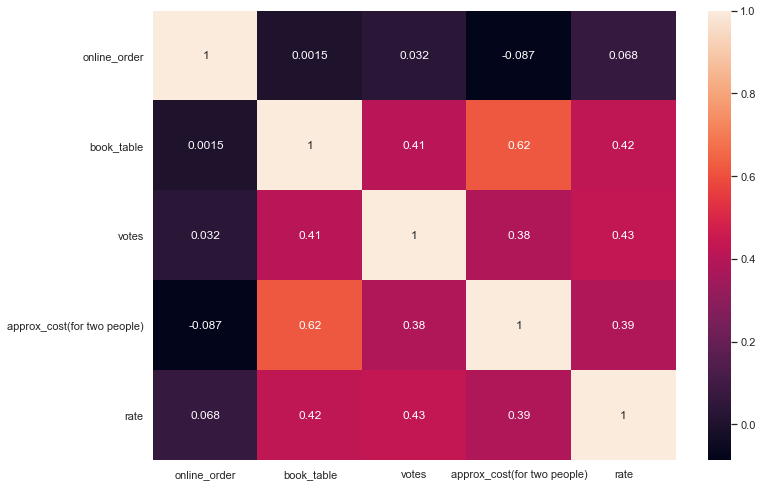

In [43]:
correlation_list = ['online_order', 'book_table', 'votes', 'approx_cost(for two people)', 'rate']
heatmap_data = zom_df_floats[correlation_list].corr()

sns.heatmap(heatmap_data, annot = True)

<AxesSubplot:xlabel='rate', ylabel='listed_in(type)'>

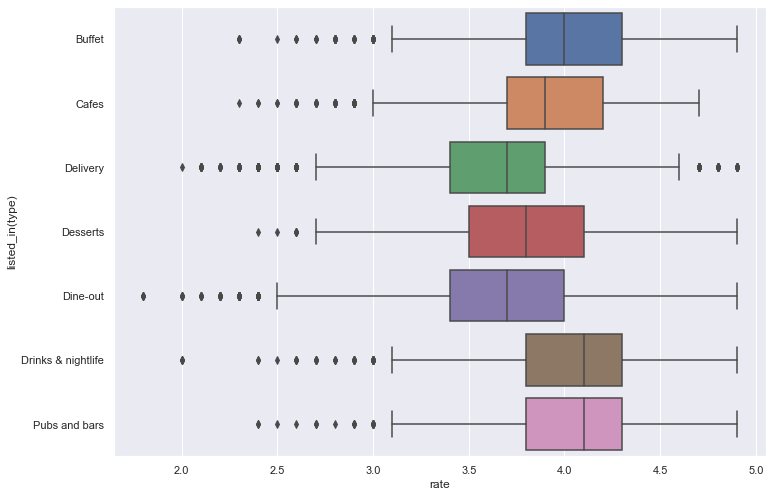

In [22]:
sns.boxplot(
    data = zom_df_floats,
    y = 'listed_in(type)', x = 'rate'
)

<AxesSubplot:xlabel='rate', ylabel='rest_type_single'>

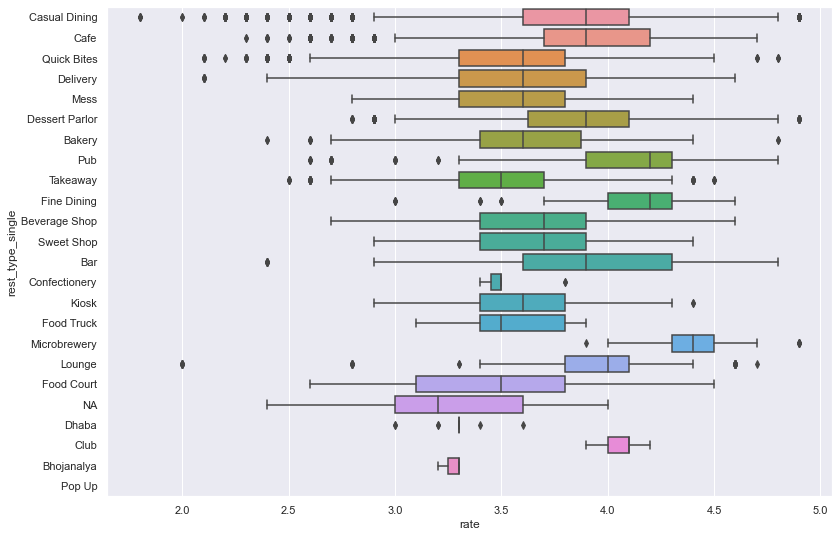

In [47]:
sns.set(rc = { 'figure.figsize':(13, 9) })

sns.boxplot(
    data = zom_df_floats,
    y = 'rest_type_single', x = 'rate'
)

Let us show a more detailed view of the relationship between rating and price.

<AxesSubplot:xlabel='rate', ylabel='approx_cost(for two people)'>

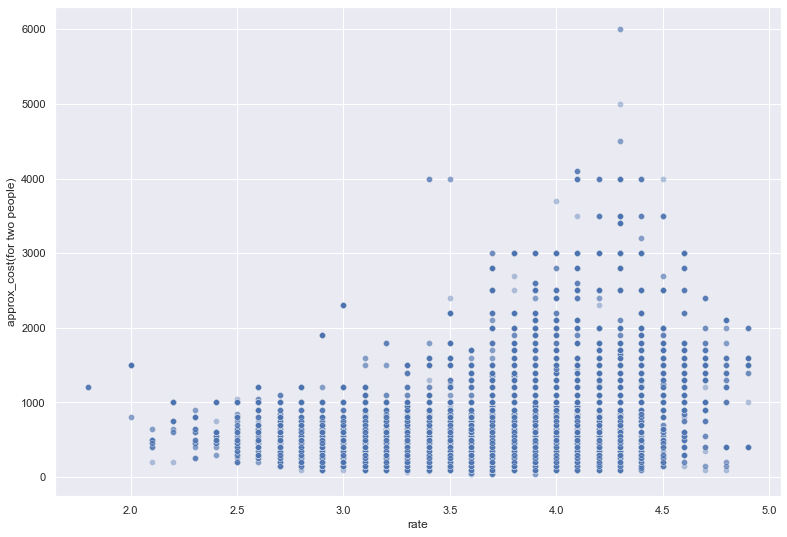

In [54]:
sns.scatterplot(
    data = zom_df_floats,
    x = 'rate', y = 'approx_cost(for two people)',
    alpha = 0.4
)

Which location has the most restaurants?

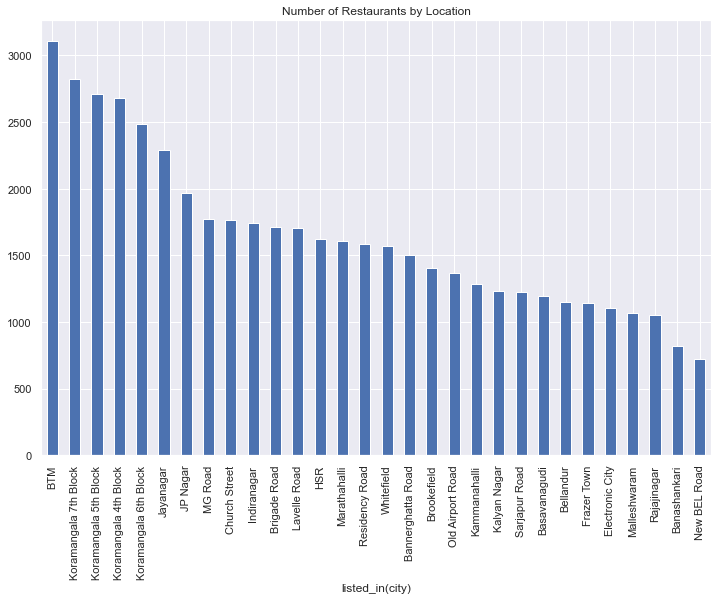

In [72]:
zom_df_floats.groupby(['listed_in(city)'])['address'].count().sort_values(ascending = False).plot(kind = 'bar', figsize = (12, 8))
    
plt.title("Number of Restaurants by Location")
plt.show()

What is the relationship between cuisines and ratings?

In [140]:
zom_df_floats.groupby('cuisine_single').describe()[zom_df_floats.groupby('cuisine_single').describe()['rate']['count'] >= 200]['rate']

,count,mean,std,min,25%,50%,75%,max
cuisine_single,,,,,,,,
American,441.0,4.159410,0.340466,2.7,4.000,4.2,4.40,4.8
Andhra,980.0,3.577551,0.401104,2.0,3.300,3.6,3.80,4.3
Arabian,445.0,3.638652,0.405078,2.6,3.400,3.7,3.90,4.4
Asian,371.0,4.145553,0.436386,3.0,4.000,4.3,4.40,4.9
Bakery,1452.0,3.624518,0.378440,2.4,3.400,3.6,3.90,4.8
Bengali,339.0,3.628614,0.424307,2.1,3.400,3.7,3.90,4.5
Beverages,952.0,3.686975,0.337459,2.7,3.400,3.7,3.90,4.6
Biryani,2227.0,3.530445,0.394456,2.1,3.300,3.5,3.80,4.6
Burger,399.0,3.762406,0.371118,2.6,3.500,3.9,4.00,4.4


In [141]:
zom_df_floats.groupby('cuisine_single').describe()[zom_df_floats.groupby('cuisine_single').describe()['rate']['count'] < 200]['rate']

,count,mean,std,min,25%,50%,75%,max
cuisine_single,,,,,,,,
African,13.0,4.592308,2.773501e-02,4.5,4.600,4.60,4.600,4.6
Assamese,12.0,3.891667,3.604501e-01,3.2,3.850,4.10,4.100,4.1
Australian,5.0,3.800000,0.000000e+00,3.8,3.800,3.80,3.800,3.8
Awadhi,19.0,3.831579,3.590924e-01,3.5,3.500,3.50,4.200,4.2
BBQ,108.0,4.004630,3.216152e-01,3.3,3.700,4.10,4.300,4.8
Bar Food,8.0,3.062500,4.596194e-01,2.9,2.900,2.90,2.900,4.2
Belgian,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bihari,24.0,3.775000,2.674355e-01,3.5,3.575,3.70,3.900,4.2
Bohri,6.0,3.583333,4.082483e-02,3.5,3.600,3.60,3.600,3.6


In [194]:
b_map = folium.Map(location = (12.9716, 77.5946), zoom_start = 11)

tooltip = 'Click for Information'

folium.Marker(location = (12.9152208, 77.573598), popup = 'Banashankari', tooltip = tooltip, ).add_to(b_map)
folium.Marker(location = (12.9417261, 77.5755021)).add_to(b_map)
folium.Marker(location = (12.9405198, 77.5794387)).add_to(b_map)


display(b_map)